In [6]:
%pip install git+https://github.com/dsdanielpark/openWakeWord.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/dsdanielpark/openWakeWord.git to /tmp/pip-req-build-awy2zy4t
  Running command git clone --filter=blob:none --quiet https://github.com/dsdanielpark/openWakeWord.git /tmp/pip-req-build-awy2zy4t
Username for 'https://github.com': ERROR: Operation cancelled by user
^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import tensorflow as tf

def save_wakeword_model(embedding, name, save_path):
    """
    주어진 평균 임베딩으로 .tflite 웨이크워드 모델 생성
    embedding: np.array
    name: 웨이크워드 이름
    save_path: 저장 경로 (.tflite)
    """
    embedding = embedding.astype(np.float32)
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=embedding.shape),
        tf.keras.layers.Lambda(lambda x: x)
    ])
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()

    with open(save_path, "wb") as f:
        f.write(tflite_model)
    print(f"저장됨: {save_path}")


In [1]:
from openwakeword.utils import create_wakeword_model

# 녹음한 wav 파일 경로 리스트 생성
audio_paths = [f"dataset/my_wakeword/{i:03d}.wav" for i in range(20)]

# 모델 생성
create_wakeword_model(
    name="hello_rokey_custom",
    audio_paths=audio_paths,
    save_path="hello_rokey_custom.tflite"
)

ImportError: cannot import name 'create_wakeword_model' from 'openwakeword.utils' (/home/kiwi/.local/lib/python3.10/site-packages/openwakeword/utils.py)

In [ ]:
import soundfile as sf
sf.write("check.wav", audio_chunk, 16000)

/home/kiwi/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


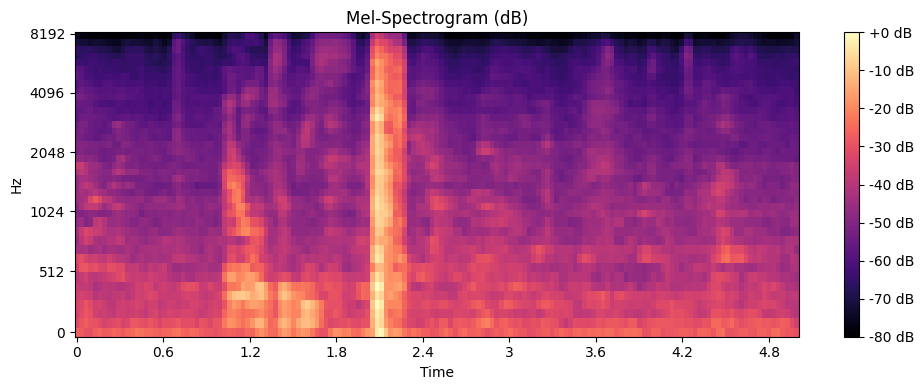

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

y, sr = librosa.load("./dataset/my_wakeword/000.wav", sr=16000)
mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40)
mel_db = librosa.power_to_db(mel, ref=np.max)

# 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
plt.title("Mel-Spectrogram (dB)")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
